In [5]:
!pip install explainableai

2024-10-21 14:11:08,962 - explainableai.core - DEBUG - Performing exploratory data analysis...
DEBUG:explainableai.core:Performing exploratory data analysis...
2024-10-21 14:11:08,969 - explainableai.core - INFO - Exploratory Data Analysis:
INFO:explainableai.core:Exploratory Data Analysis:
2024-10-21 14:11:08,989 - explainableai.core - INFO - Dataset shape: (312, 2)
INFO:explainableai.core:Dataset shape: (312, 2)
2024-10-21 14:11:08,995 - explainableai.core - INFO - Dataset info:
INFO:explainableai.core:Dataset info:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           312 non-null    object 
 1   Sales Per Day  312 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.0+ KB


2024-10-21 14:11:09,029 - explainableai.core - INFO - Summary statistics:
INFO:explainableai.core:Summary statistics:
2024-10-21 14:11:09,043 - explainableai.core - INFO -        Sales Per Day
count     312.000000
mean    11819.143749
std      1630.262634
min      7558.264812
25%     10655.179255
50%     11968.195865
75%     12999.971633
max     16272.483870
INFO:explainableai.core:       Sales Per Day
count     312.000000
mean    11819.143749
std      1630.262634
min      7558.264812
25%     10655.179255
50%     11968.195865
75%     12999.971633
max     16272.483870
2024-10-21 14:11:09,057 - explainableai.core - INFO - Missing values:
INFO:explainableai.core:Missing values:
2024-10-21 14:11:09,065 - explainableai.core - INFO - DATE             0
Sales Per Day    0
dtype: int64
INFO:explainableai.core:DATE             0
Sales Per Day    0
dtype: int64
2024-10-21 14:11:09,071 - explainableai.core - INFO - Data types:
INFO:explainableai.core:Data types:
2024-10-21 14:11:09,079 - explaina

  0%|          | 0/312 [00:00<?, ?it/s]

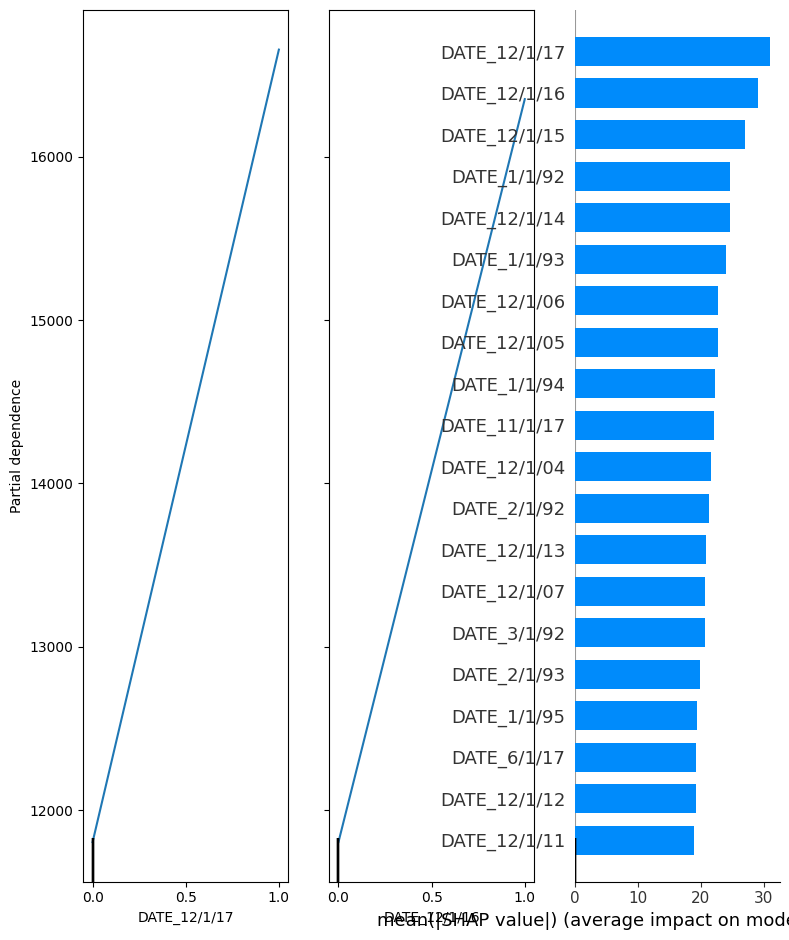

2024-10-21 15:02:11,282 - explainableai.feature_analysis - INFO - Dataframe Created...
INFO:explainableai.feature_analysis:Dataframe Created...
2024-10-21 15:02:11,312 - explainableai.core - INFO - Performing cross-validation...
INFO:explainableai.core:Performing cross-validation...
2024-10-21 15:02:11,316 - explainableai.model_evaluation - DEBUG - Cross validation...
DEBUG:explainableai.model_evaluation:Cross validation...
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/d

## Summary:

This model seems almost *too* good to be true. It predicts your data perfectly according to these results, which suggests something might be off.  We need to investigate further before trusting these results completely. 

## Model Performance:

* **Mean Squared Error (MSE):**  This measures the average difference between your model's predictions and the actual values.  A perfect score is 0, and yours is incredibly close to that. 
* **R-squared Score:** This tells you how well the model explains the variation in your data. A perfect score is 1.0, meaning your model captures everything.

Both metrics suggest your model is incredibly accurate, perhaps suspiciously so. 

## Important Features:

The most important features are all dates, specifically dates around December 1st in recent years and January 1st, 1992. This suggests your data might be heavily influenced by seasonal trends or specific events around these dates. 

## Next Steps:

1. **Investigate for Data Leakage:**  

2024-10-21 15:02:28,504 - explainableai.report_generator - DEBUG - Setting up the styles...
DEBUG:explainableai.report_generator:Setting up the styles...
2024-10-21 15:02:28,517 - explainableai.report_generator - DEBUG - Adding heading: Explainable AI Report
DEBUG:explainableai.report_generator:Adding heading: Explainable AI Report


Do you want all sections in the xai_report? (y/n) y


2024-10-21 15:02:41,879 - explainableai.report_generator - DEBUG - Adding heading: Model Comparison
DEBUG:explainableai.report_generator:Adding heading: Model Comparison
2024-10-21 15:02:41,884 - explainableai.report_generator - DEBUG - Adding table...
DEBUG:explainableai.report_generator:Adding table...
2024-10-21 15:02:41,890 - explainableai.report_generator - DEBUG - Adding heading: Model Performance
DEBUG:explainableai.report_generator:Adding heading: Model Performance
2024-10-21 15:02:41,895 - explainableai.report_generator - DEBUG - Adding paragraph: **mean_squared_error:** 0.0000
DEBUG:explainableai.report_generator:Adding paragraph: **mean_squared_error:** 0.0000
2024-10-21 15:02:41,898 - explainableai.report_generator - DEBUG - Fromatting text: **mean_squared_error:** 0.0000
DEBUG:explainableai.report_generator:Fromatting text: **mean_squared_error:** 0.0000
2024-10-21 15:02:41,901 - explainableai.report_generator - DEBUG - Adding paragraph: **r2_score:** 1.0000
DEBUG:explaina

<Figure size 1200x800 with 0 Axes>

In [6]:
import os
import pandas as pd
from explainableai import XAIWrapper
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

# Set the Google API key
os.environ['GOOGLE_API_KEY'] = 'Replace with your API key'

df = pd.read_csv('real_sales_per_day.csv')
X = df.drop(columns=['Sales Per Day'])
y = df['Sales Per Day']

XAIWrapper.perform_eda(df)

models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression(),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

xai = XAIWrapper()
xai.fit(models, X, y)
results = xai.analyze()

print(results['llm_explanation'])

xai.generate_report('Explainable AI Report.pdf')
